# K-Means Clustering
Unsupervised Learning approach where dataset has no labels

<img src="pics\km.pic3.png" width="390" align='left'>
<img src="pics\km.pic4.png" width="390" align='right'>
<img src="pics\km.pic5.png" width="390" align='left'>
<img src="pics\km.pic6.png" width="390" align='right'>
<img src="pics\km.pic1.png" width="700" align='left'>



In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Kmeans:
    def __init__(self, K=3, n_iters=100):
        self.n_clusters = K
        self.n_iters = n_iters
        # list to store clusters result
        self.clusters = [[] for _ in range(self.n_clusters)] 
        # list to store centroids
        self.centroids = []
        
    def learn(self, X):
        self.X = X
        self.n_samples, self.n_feats = X.shape
        
        # pick random centroids:
        random_idxs = np.random.choice(self.n_samples,self.n_clusters,replace=False)
        self.centroids = list(self.X[random_idxs])
        # learning step
        for _ in range(self.n_iters):
            # new clusters
            self.clusters = self.make_clusters(self.centroids)
            # new centroids
            new_centroids = self.get_centroids(self.clusters)
            # checking convergence
            ctrs_dist = []
            for ctr1,ctr2 in zip(self.centroids, new_centroids):
                ctrs_dist.append(self.distance(ctr1,ctr2))
            if sum(ctrs_dist) == 0:
                break
            else: 
                self.centroids = new_centroids
            
    def make_clusters(self, centroids):
        clusters = [[] for _ in range(self.n_clusters)]
        for x in X:        
            distances = [self.distance(x,ctr) for ctr in centroids]  
            min_ctr_idx = np.argmin(distances)
            clusters[min_ctr_idx].append(x)
        return clusters
               
    def get_centroids(self, clusters):
        return [np.mean(cluster, axis=0) for cluster in clusters]
        
    def distance(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))
    
    def result(self):
        clusted_X =[]
        labels = []
        for cls_idx, cluster in enumerate(self.clusters):
            clusted_X.extend(cluster)
            labels.extend([cls_idx]*len(cluster))
        return np.array(clusted_X), np.array(labels)

there are 5 clusters


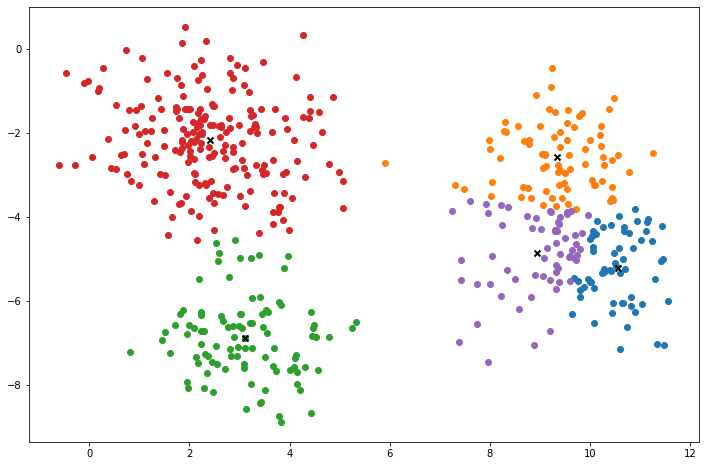

In [10]:
from sklearn.datasets import make_blobs
np.random.seed(42)
X, y = make_blobs(centers=5, n_samples=500, n_features=2, 
                  shuffle=True, random_state=30)
print(f'there are {len(np.unique(y))} clusters')
model = Kmeans(K=5)
model.learn(X)
X_clustered, y = model.result()

fig, ax = plt.subplots(figsize=(12,8))
for cluster in model.clusters:
    points = np.array(cluster).T
    ax.scatter(*points)
for ctr in model.centroids:
    ax.scatter(*ctr, marker='x', color='black', linewidth=2)
plt.show()
